<a href="https://colab.research.google.com/github/rebeckakarras/projekt2/blob/main/FA_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=2f35feaed561c060bc4194fe3aa2d6ee1c4d91ff139e2cf58e6c14c2dad3d199
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [2]:
data_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


KeyboardInterrupt: 

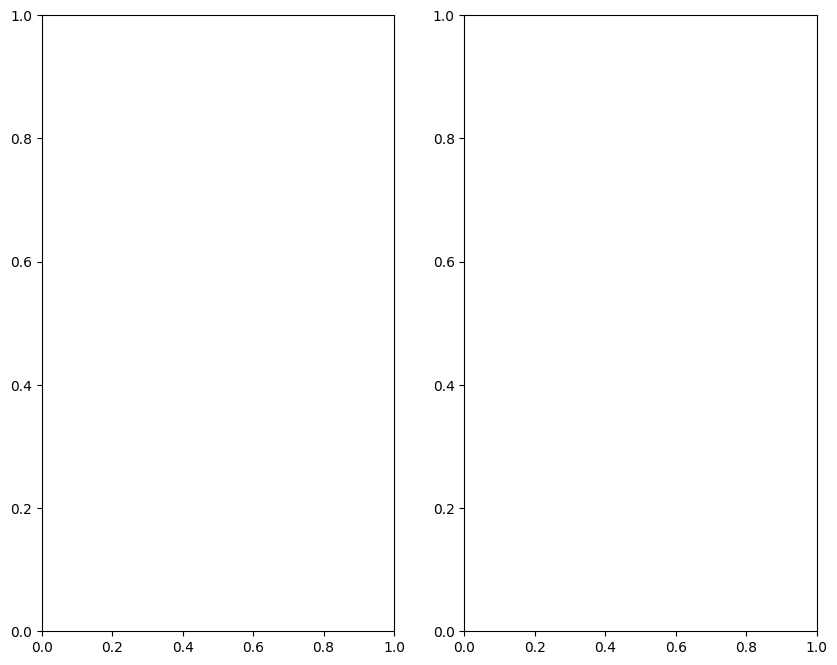

In [3]:
X = StandardScaler().fit_transform(data_white)  # Standardize the data
factors = 5 # BAsed on previous PCA
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(data_white.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(data_white.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

In [6]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer

# Standardize the features before applying Factor Analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_white)

# Perform Factor Analysis
transformer = FactorAnalysis(n_components=2)
X_transformed = transformer.fit_transform(X_scaled)

factor_loadings = transformer.components_
# Check the shape of the transformed data
print(X_transformed.shape)
# Access the factor loadings (relationship between original variables and components)

# Convert to a DataFrame for better visualization
loadings_df = pd.DataFrame(factor_loadings, columns=data_white.columns, index=["Factor 1", "Factor 2"])

# Display the factor loadings
loadings_df


(4898, 2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Factor 1,0.264297,0.026490,0.149843,0.839199,0.257480,0.300297,0.533069,0.999710,-0.093733,0.074601,-0.780213,-0.306568
Factor 2,-0.137170,-0.108446,0.051871,0.048277,0.026158,0.940516,0.483417,-0.006376,0.031543,0.041448,-0.016404,0.105960


In [11]:
fa = FactorAnalyzer(n_factors=2, rotation=None)

X = StandardScaler().fit_transform(data_white)
# Fit the factor analysis model
fa.fit(X)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=2, rotation=None, rotation_kwargs={},
            use_smc=True)


# Get factor loadings, eigenvalues, etc.
loadings = fa.loadings_

eigenvalues, _ = fa.get_eigenvalues()

loadings_df = pd.DataFrame(loadings,
                           index=data_white.columns,   # Set the row index to be the feature names
                           columns=["Factor 1", "Factor 2"])  # Name factors

# Display the DataFrame of factor loadings
print(loadings_df)



                      Factor 1  Factor 2
fixed acidity         0.252065 -0.602546
volatile acidity      0.031705 -0.000208
citric acid           0.185427 -0.229026
residual sugar        0.684409  0.024683
chlorides             0.308029 -0.017033
free sulfur dioxide   0.416656  0.298601
total sulfur dioxide  0.640603  0.276348
density               0.976836  0.002260
pH                   -0.196871  0.559008
sulphates             0.048824  0.158496
alcohol              -0.759169 -0.018811
quality              -0.329129  0.099992


<Axes: >

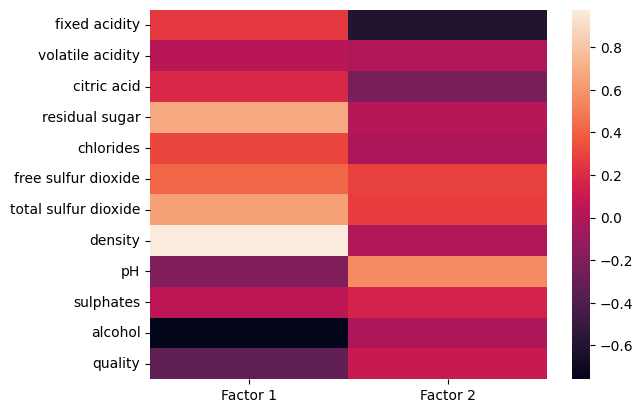

In [12]:
sns.heatmap(loadings_df)


In [13]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
communalities = loadings ** 2  # Square the factor loadings
communalities = communalities.sum(axis=1)  # Sum the squared loadings across factors (row-wise sum)

# Convert communalities into a DataFrame (optional for better readability)
communalities_df = pd.DataFrame(communalities, index=data_white.columns, columns=['Communality'])

communalities_df

,Communality
fixed acidity,0.426598
volatile acidity,0.001005
citric acid,0.086836
residual sugar,0.469024
chlorides,0.095172
free sulfur dioxide,0.262765
total sulfur dioxide,0.486741
density,0.954214
pH,0.351248
sulphates,0.027505


In [18]:
uniqueness = fa.get_uniquenesses()

# Get the factor loadings (this is the lambda matrix)
lambda_ = fa.loadings_

# Construct the psi (diagonal matrix of uniquenesses)
psi = np.diag(uniqueness)

# Get the correlation matrix (s)
s = np.corrcoef(np.transpose(data_white))

# Calculate the sigma matrix: sigma = lambda_.T * lambda_ + psi
# Since lambda_ is (n_variables, n_factors), we need to calculate lambda_ @ lambda_.T
sigma = np.matmul(lambda_, lambda_.T) + psi

# Calculate residuals: residuals = s - sigma
residuals = s - sigma

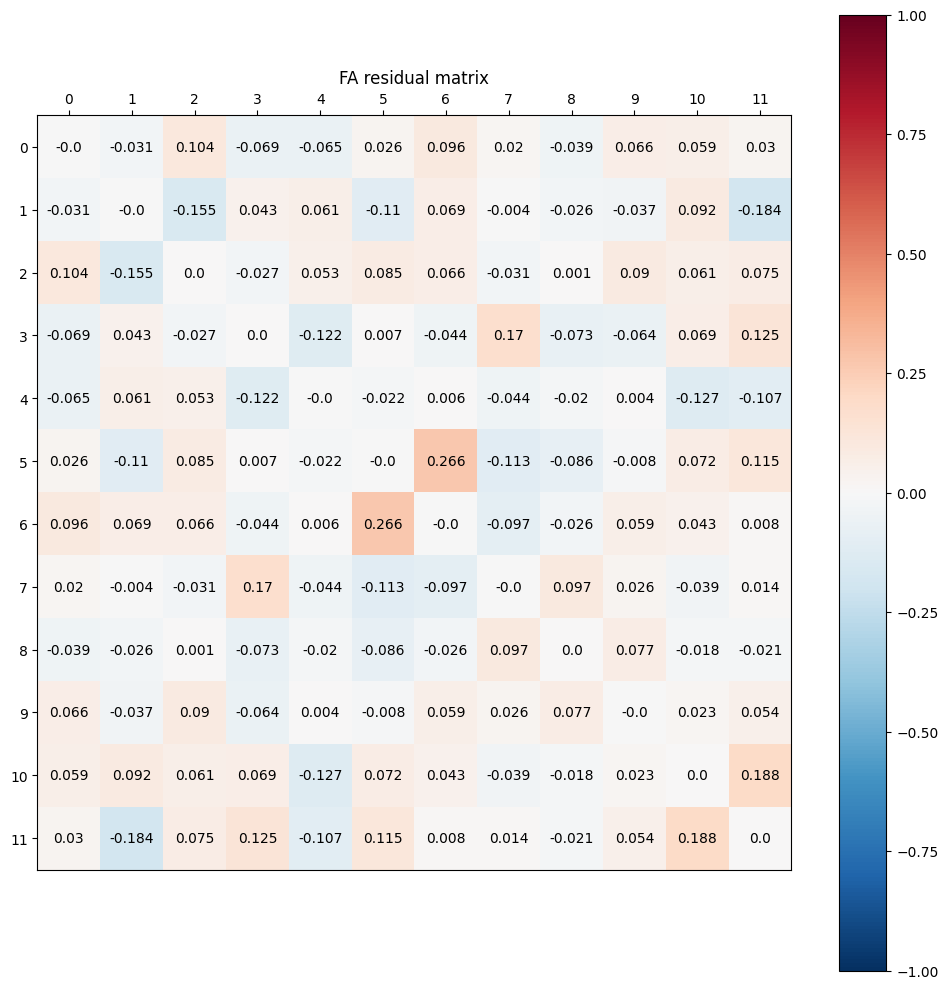

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(12))
ax.set_yticks(range(12))
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

plt.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

In [ ]:
pip install factor_analyzer